In [1071]:
%matplotlib inline

In [1072]:
import pandas as pd
import igraph as ig
import sys, getopt
import time
import matplotlib.pyplot as plt
from itertools import zip_longest

In [1073]:
def printUsage():
    print('Usage: python3 ig-compose.py <inputfile1> <inputfile2>')

time = 0.00023698806762695312
G1 node attributes: ['G1_0', 'G1_1', 'G1_2', 'G1_3', 'G1_4']
G2 node attributes: ['G2_0', 'G2_1', 'G2_2', 'G2_3', 'G2_4', 'G2_5', 'G2_6', 'G2_7', 'G2_8', 'G2_9']
G0 node attributes: [('G1_0', 'G2_0'), ('G1_1', 'G2_1'), ('G1_2', 'G2_2'), ('G1_3', 'G2_3'), ('G1_4', 'G2_4'), (None, 'G2_5'), (None, 'G2_6'), (None, 'G2_7'), (None, 'G2_8'), (None, 'G2_9')]


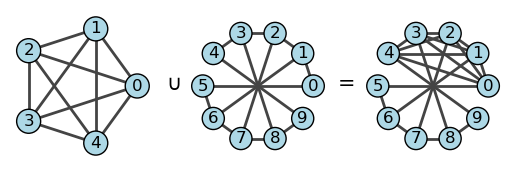

In [1074]:
# def main(argv):
#     try:
#         opts, args = getopt.getopt(argv, "h") # opts = [("-h", " ")], args = [inputfile1, inputfile2]
#     except getopt.GetoptError:
#         printUsage()
#         sys.exit(2)
#     for opt, arg in opts:
#         if opt == '-h':
#             printUsage()
#             sys.exit()
#         else:
#             printUsage()
#             sys.exit(2)
#     if len(args) != 2:
#             printUsage()
#             sys.exit(2)       
#     edgefile1 = args[0]
#     edgefile2 = args[1]

edgefile1, edgefile2 = "11.edges", "22.edges"

# read edge info from edge file
# columns = ["s", "d"]
# data1 = pd.read_csv(edgefile1, comment="#", sep="\s+", names=columns)
# edges1 = []
# for row in range(len(data1)):
#     edges1.append([data1["s"][row], data1["d"][row]])
# data2 = pd.read_csv(edgefile2, comment="#", sep="\s+", names=columns)
# edges2 = []
# for row in range(len(data2)):
#     edges2.append([data2["s"][row], data2["d"][row]])

# create graph based on edge file
# DO NOT USE igraph._igraph.GraphBase, USE SUBCLASS igraph.Graph instead
# Read_Edgelist() in igraph is 0-based !!! (number vertices from 0)
G1 = ig.Graph.Read_Edgelist(edgefile1, directed=False)
G2 = ig.Graph.Read_Edgelist(edgefile2, directed=False)

start = time.time()
G0 = ig.union([G1, G2]) # G0 = G1 U G2
end = time.time()

print("time = " + str(end - start))

for i in range(len(G1.vs)):
    G1.vs[i]["name"] = "G1_" + str(i)
for i in range(len(G2.vs)):
    G2.vs[i]["name"] = "G2_" + str(i)
G0.vs["name"] = list(zip_longest(G1.vs["name"], G2.vs["name"]))
print("G1 node attributes: " + str(G1.vs["name"]))
print("G2 node attributes: " + str(G2.vs["name"]))
print("G0 node attributes: " + str(G0.vs["name"]))

# write to file
edgefile0 = edgefile1.split('.edges')[0] + "." + edgefile2.split('.edges')[0] + ".edges"
df = pd.DataFrame(G0.get_edgelist())
df.to_csv(edgefile0, sep=" ", index=False, header=False)

# visulize
visual_style = {
"vertex_color": "lightblue",
"vertex_size": 0.4,
}
fig, axs = plt.subplots(1, 3)
ig.plot(
    G1,
    layout=G1.layout("circle"),
    vertex_label=range(G1.vcount()),
    target=axs[0],
    **visual_style,
)
ig.plot(
    G2,
    layout=G2.layout("circle"),
    vertex_label=range(G2.vcount()),
    target=axs[1],
    **visual_style,
)
ig.plot(
    G0,
    layout=G0.layout("circle"),
    vertex_label=range(G0.vcount()),
    target=axs[2],
    **visual_style,
)
fig.text(0.38, 0.5, '$\cup$', fontsize=15, ha='center', va='center')
fig.text(0.65, 0.5, '=', fontsize=15, ha='center', va='center')
plt.show()

In [1075]:
# if __name__ == "__main__":
#    main(sys.argv[1:])  